 Pymaceuticals Inc.



Analysis: 

In [86]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files 
mouse_metadata_path = "/Users/cris/Desktop/mod 5 challenge/Mouse_metadata.csv"
study_results_path = "/Users/cris/Desktop/mod 5 challenge/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dtaset 
total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview 
total_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [87]:
# Checking the number of mice
mice_data = total_data ["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice 

249

In [88]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dupes = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated()==True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [89]:
# Optional: Get all the data for the duplicate mouse ID.
mice_dupes_data = total_data.loc[total_data["Mouse ID"]== mice_dupes_id[0]]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
 # Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_total_data["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice 

249

Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_reg_data = clean_total_data.set_index (["Drug Regimen"])
group_drug_data = drug_reg_data.groupby ("Drug Regimen")
drug_reg_mean= group_drug_data ["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data ["Tumor Volume (mm3)"].median ()
drug_reg_var = group_drug_data ["Tumor Volume (mm3)"].var()
drug_red_std = group_drug_data["Tumor Volume (mm3)"].std
drug_reg_sem = group_drug_data ["Tumor Volume (mm3)"]. sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,
                                "Median Tumor Volume": drug_reg_median, 
                                "Tumor Volume Variance": drug_reg_var,
                                "Tumor Volume Std. Dev.": drug_red_std,
                                "Tumor Volume Std. Err.": drug_reg_sem})
drug_reg_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,<bound method GroupBy.std of <pandas.core.grou...,0.329346
Ceftamin,52.591172,51.776157,39.290177,<bound method GroupBy.std of <pandas.core.grou...,0.469821
Infubinol,52.884795,51.820584,43.128684,<bound method GroupBy.std of <pandas.core.grou...,0.492236
Ketapril,55.235638,53.698743,68.553577,<bound method GroupBy.std of <pandas.core.grou...,0.603860
Naftisol,54.331565,52.509285,66.173479,<bound method GroupBy.std of <pandas.core.grou...,0.596466
Placebo,54.033581,52.288934,61.168083,<bound method GroupBy.std of <pandas.core.grou...,0.581331
Propriva,52.393463,50.909965,43.138803,<bound method GroupBy.std of <pandas.core.grou...,0.525862
Ramicane,40.216745,40.673236,23.486704,<bound method GroupBy.std of <pandas.core.grou...,0.320955
Stelasyn,54.233149,52.431737,59.450562,<bound method GroupBy.std of <pandas.core.grou...,0.573111


Bar and Pie Charts

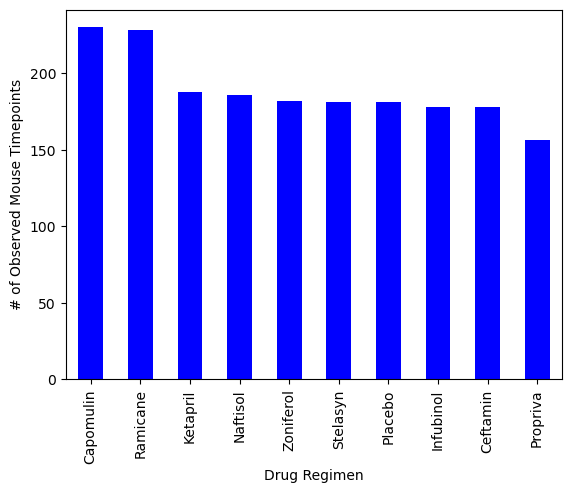

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_and_drugs = clean_total_data[["Drug Regimen", "Timepoint"]]

#find count per drug 
mice_per_drug = mice_and_drugs ["Drug Regimen"]. value_counts()
mice_per_drug

#Use DataFrame.plot() in order to create a bar of the data 
mice_per_drug.plot(kind ="bar", color = "b",
                   xlabel = "Drug Regimen",
                   ylabel= "# of Observed Mouse Timepoints")

plt.show()



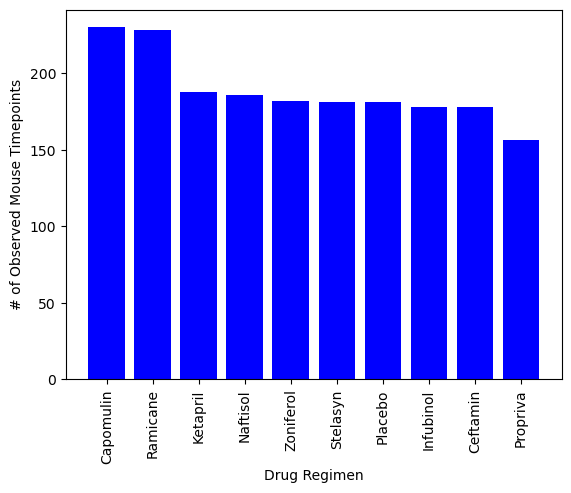

In [94]:
 # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values

#graph build and display 
plt.bar(drugs,count, color = "b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)
plt.show()

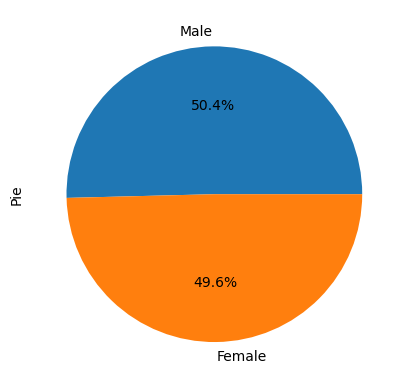

In [95]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Assuming ‘clean_total_data’ is your DataFrame
# Get unique mice and their gender 

unique_mice = clean_total_data [['Mouse ID', 'Sex']].drop_duplicates()
# Count the occurrences of each gender

male_v_female =  pd.Series ([50.4,49.6],index=["Male","Female"])
# Print counts to verify


# Generate the pie chart
male_v_female.plot(kind="pie", autopct= "%1.1f%%", ylabel="Pie")
# Show the plot

male_v_female = pd.Series ([50.4,49.6],index=["Male","Female"])
plt.show()



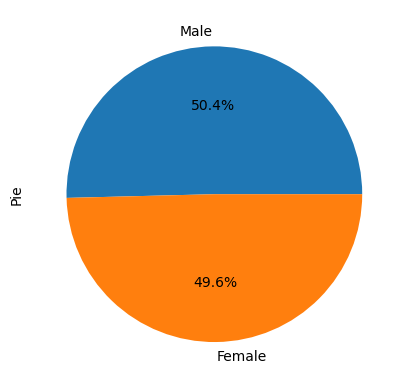

In [96]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study


# Manually set the counts for male and female

male_v_female = pd.Series ([50.4, 49.6], index=["Male","Female"])
# Extract labels and values

sex_label = male_v_female.index.values 
count_value = male_v_female.values


# Generate the pie chart using pyplot
plt.pie(count_value, labels=sex_label, autopct="%1.1f%%")

plt.ylabel("Pie")  

# Show the plot
plt.show()




Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
by_mice=total_data.groupby(["Mouse ID"]).max()
by_mice_reset = by_mice.reset_index()

merged_data= by_mice_reset[['Mouse ID', 'Timepoint']].\
        merge(total_data,on=['Mouse ID', 'Timepoint'],how="left")
        
        
        
def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"]== regimen]['Tumor Volume (mm3)']

    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range= quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 *quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound)  | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")                                                            
    return regimen_data

cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers ("Ceftamin")





Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
    # Determine outliers using upper and lower bounds
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = total_data[total_data["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1




------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

/var/folders/9z/2rgm3rln3xjf3b156_g338w00000gn/T/ipykernel_73586/2589521670.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cap,ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)


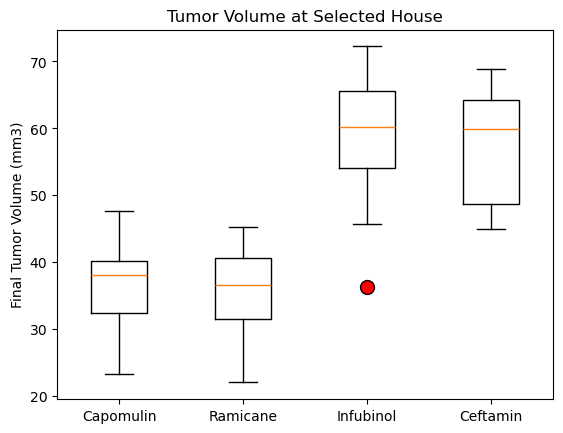

In [145]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_dot= dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap,ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected House')
plt.show()





Line and Scatter Plots

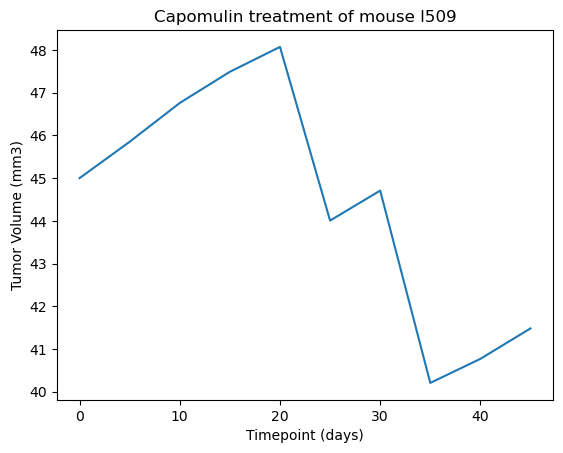

In [80]:

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"]== "Capomulin")& (clean_total_data ["Mouse ID"]=="l509")]
reduced_capomulin_df = capomulin_df [["Timepoint", "Tumor Volume (mm3)"]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

plt.plot (timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

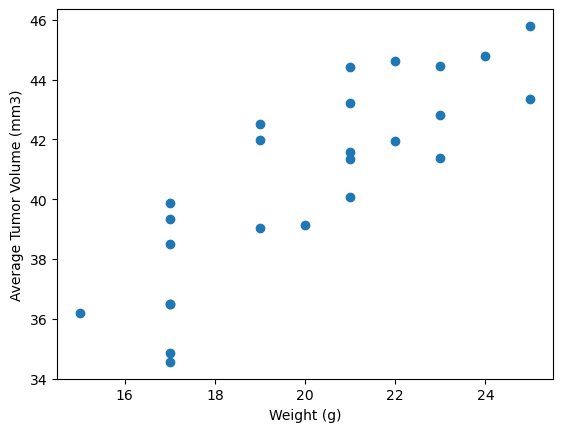

In [81]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"]=="Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"]. mean()
avg_capomulin_df = pd.DataFrame ({"Weight (g)": weight,
                                  "Tumor Volume (mm3)":avg_tumor_vol})

plt.scatter(weight,avg_tumor_vol)
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.show ()


 Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


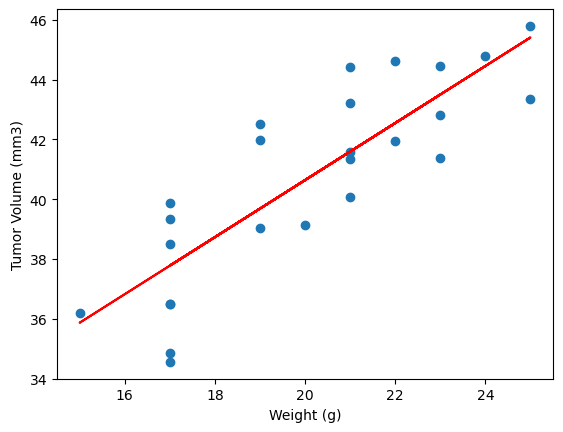

In [85]:
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values= avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()